## Empirical Distribution and Inverse Transform Theorem

In [42]:
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [43]:
from statsmodels.distributions.empirical_distribution import ECDF

In [44]:
normals = sp.random.normal(0,1,10000)
normals_right = sp.random.normal(4,0.5,2000)

In [45]:
bin_val = 20

In [46]:
empirical = np.append(normals, normals_right)

Text(0.5, 1.0, 'Density')

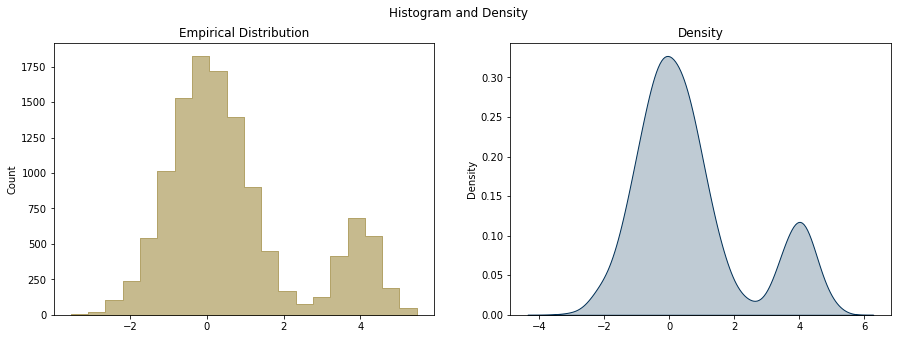

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histogram and Density')

sns.histplot(ax=axes[0], x=empirical, bins=20, color='#B3A369', element='step')
axes[0].set_title('Empirical Distribution')

sns.kdeplot(ax=axes[1], x=empirical, color='#003057', fill='#003057')
axes[1].set_title('Density')

In [7]:
values, bins = np.histogram(empirical, bins=bin_val)

In [8]:
values

array([   3,   19,   74,  218,  559, 1053, 1674, 1994, 1873, 1306,  776,
        321,   95,  121,  431,  730,  582,  142,   24,    5], dtype=int64)

In [9]:
bins

array([-3.88040025, -3.37695062, -2.873501  , -2.37005137, -1.86660174,
       -1.36315211, -0.85970249, -0.35625286,  0.14719677,  0.65064639,
        1.15409602,  1.65754565,  2.16099527,  2.6644449 ,  3.16789453,
        3.67134415,  4.17479378,  4.67824341,  5.18169304,  5.68514266,
        6.18859229])

In [10]:
len([el for el in empirical if (el >=-3.31) and (el <=-2.86)])

18

In [11]:
pdf = np.round(values / np.sum(values), 3)
pdf

array([0.   , 0.002, 0.006, 0.018, 0.047, 0.088, 0.14 , 0.166, 0.156,
       0.109, 0.065, 0.027, 0.008, 0.01 , 0.036, 0.061, 0.048, 0.012,
       0.002, 0.   ])

In [12]:
len(bins), len(pdf), pdf[8]

(21, 20, 0.156)

In [13]:
[(i,el) for i,el in enumerate(values / np.sum(values))]

[(0, 0.00025),
 (1, 0.0015833333333333333),
 (2, 0.006166666666666667),
 (3, 0.018166666666666668),
 (4, 0.04658333333333333),
 (5, 0.08775),
 (6, 0.1395),
 (7, 0.16616666666666666),
 (8, 0.15608333333333332),
 (9, 0.10883333333333334),
 (10, 0.06466666666666666),
 (11, 0.02675),
 (12, 0.007916666666666667),
 (13, 0.010083333333333333),
 (14, 0.035916666666666666),
 (15, 0.060833333333333336),
 (16, 0.0485),
 (17, 0.011833333333333333),
 (18, 0.002),
 (19, 0.0004166666666666667)]

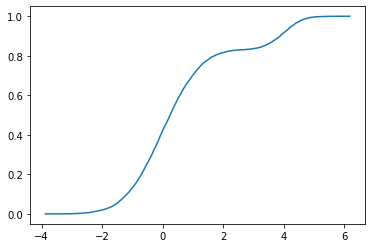

In [14]:
ecdf = ECDF(empirical)
plt.plot(ecdf.x, ecdf.y)
plt.show()

<AxesSubplot:ylabel='Density'>

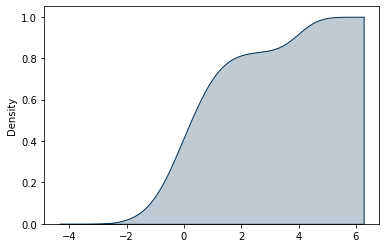

In [50]:
sns.kdeplot(x=empirical, cumulative=True, color='#003057', fill='#003057')

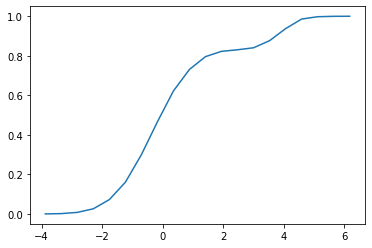

In [15]:
plt.plot(np.linspace(np.min(empirical),np.max(empirical),bin_val),np.cumsum(values/np.sum(values)))

In [16]:
np.cumsum(values/np.sum(values))

array([2.50000000e-04, 1.83333333e-03, 8.00000000e-03, 2.61666667e-02,
       7.27500000e-02, 1.60500000e-01, 3.00000000e-01, 4.66166667e-01,
       6.22250000e-01, 7.31083333e-01, 7.95750000e-01, 8.22500000e-01,
       8.30416667e-01, 8.40500000e-01, 8.76416667e-01, 9.37250000e-01,
       9.85750000e-01, 9.97583333e-01, 9.99583333e-01, 1.00000000e+00])

In [17]:
bins

array([-3.88040025, -3.37695062, -2.873501  , -2.37005137, -1.86660174,
       -1.36315211, -0.85970249, -0.35625286,  0.14719677,  0.65064639,
        1.15409602,  1.65754565,  2.16099527,  2.6644449 ,  3.16789453,
        3.67134415,  4.17479378,  4.67824341,  5.18169304,  5.68514266,
        6.18859229])

In [18]:
values

array([   3,   19,   74,  218,  559, 1053, 1674, 1994, 1873, 1306,  776,
        321,   95,  121,  431,  730,  582,  142,   24,    5], dtype=int64)

In [19]:
mycdf = np.cumsum(values/np.sum(values))

In [20]:
mycdf

array([2.50000000e-04, 1.83333333e-03, 8.00000000e-03, 2.61666667e-02,
       7.27500000e-02, 1.60500000e-01, 3.00000000e-01, 4.66166667e-01,
       6.22250000e-01, 7.31083333e-01, 7.95750000e-01, 8.22500000e-01,
       8.30416667e-01, 8.40500000e-01, 8.76416667e-01, 9.37250000e-01,
       9.85750000e-01, 9.97583333e-01, 9.99583333e-01, 1.00000000e+00])

In [21]:
mycdf>=0.5, np.argmax(mycdf >= 0.5)

(array([False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]),
 8)

In [57]:
np.argmax(ecdf.y > 0.4)

4801

In [58]:
ecdf.x[4801]

-0.060729440353384345

In [53]:
np.sum(mycdf < 0.4)

7

In [54]:
(np.linspace(np.min(empirical),np.max(empirical),bin_val)[7] + np.linspace(np.min(empirical),np.max(empirical),bin_val)[6]) / 2

-0.4621863956421832

In [26]:
values/np.sum(values)

array([0.00025   , 0.00158333, 0.00616667, 0.01816667, 0.04658333,
       0.08775   , 0.1395    , 0.16616667, 0.15608333, 0.10883333,
       0.06466667, 0.02675   , 0.00791667, 0.01008333, 0.03591667,
       0.06083333, 0.0485    , 0.01183333, 0.002     , 0.00041667])

In [27]:
pdf = np.zeros_like(bins)
for step in np.arange(1000):
    u = np.random.uniform()
    p = np.argmax(mycdf > u)
    pdf[p]+=1

pdf = pdf / np.sum(pdf)

Text(0.5, 1.0, 'PDF from Bootstrapping')

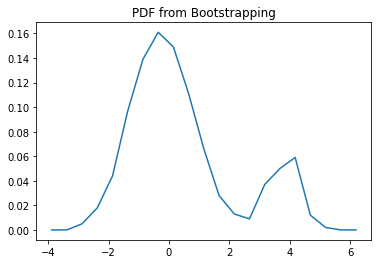

In [28]:
plt.plot(bins, pdf)
plt.title('PDF from Bootstrapping')

In [29]:
pdf

array([0.   , 0.   , 0.005, 0.018, 0.044, 0.097, 0.139, 0.161, 0.149,
       0.111, 0.066, 0.028, 0.013, 0.009, 0.037, 0.05 , 0.059, 0.012,
       0.002, 0.   , 0.   ])

## Aside: Calculating the Bins + Values manually

In [38]:
bin_val = 10

In [39]:
min(empirical), max(empirical)

(-3.880400249539426, 6.18859228971876)

In [40]:
range_delta = (np.abs(min(empirical)) +np.abs(max(empirical)) ) / bin_val

Note, the change in bin_val, will have an impact on the pdf.

e.g. using 10 will lead to what is seen in the kde density plot, with values around x=0 -> 30%, while this changes when split into 20 bins having x=0 -> 12% (because we see bins -0.3 and +0.3 also with around 10% -> sum = 30% again).

In [41]:
bound = [min(empirical) + i*range_delta for i in np.arange(bin_val)]
bound = np.append(bound, np.max(bound)+range_delta)
for i in np.arange(len(bound)-1):
    print(np.round(bound[i],3),np.round(bound[i+1],3), ':', np.sum(np.unique([el for el in empirical if (el < bound[i+1] and el >= bound[i])], return_counts=True)[1]), np.round(np.sum(np.unique([el for el in empirical if (el < bound[i+1] and el >= bound[i])], return_counts=True)[1]) / len(empirical),3))

-3.88 -2.874 : 22 0.002
-2.874 -1.867 : 292 0.024
-1.867 -0.86 : 1612 0.134
-0.86 0.147 : 3668 0.306
0.147 1.154 : 3179 0.265
1.154 2.161 : 1097 0.091
2.161 3.168 : 216 0.018
3.168 4.175 : 1161 0.097
4.175 5.182 : 724 0.06
5.182 6.189 : 28 0.002


In [33]:
len(empirical)

12000